In [3]:
import pandas as pd
import numpy as np
import numpy
from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot

from sklearn.metrics import mean_squared_error
import math

# LSTM for international airline passengers problem with window regression framing
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

Using TensorFlow backend.
/home/kt-internee-01/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/kt-internee-01/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/kt-internee-01/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/kt-internee-01/anaconda3/l

In [4]:
df = pd.read_csv("SQLAExportSATURDAY.txt",delimiter="\t")

In [5]:
df.to_csv("SQLAExportSATURDAY.csv", encoding='utf-8', index=False)

In [6]:
df.head()

,DATECL,VOLUME
0,2/01/2018,51
1,3/01/2018,57
2,4/01/2018,47
3,5/01/2018,49
4,6/01/2018,1


In [7]:
def parser(x):
	return datetime.strptime(x, '%d/%m/%Y')

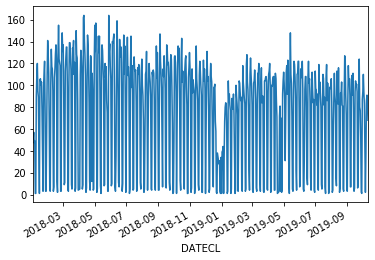

In [8]:
series = pd.read_csv('SQLAExportSATURDAY.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
# iterating the columns 

series.plot()
pyplot.show()

In [9]:
import pandas as pd
df = pd.read_csv("SQLAExportSATURDAY.csv", index_col="DATECL")
df.index = pd.DatetimeIndex(df.index)
print(df.index[0].strftime('%Y/%m/%d'))
df = df.reindex(pd.date_range(df.index[0].strftime('%Y/%m/%d'), df.index[-1].strftime('%Y/%m/%d')), fill_value=0)
df.to_csv('test.csv', index_label = 'DATECL')

2018/02/01


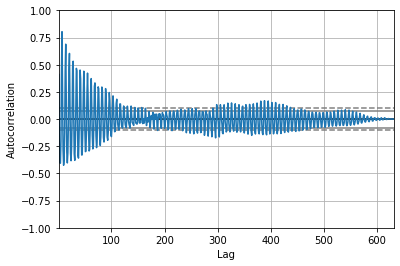

In [10]:
autocorrelation_plot(series)
pyplot.show()

In [11]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [12]:
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = read_csv('test.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1)).fit(dataset)
dataset = scaler.transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [13]:
# reshape into X=t and Y=t+1
look_back = 35
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(100, input_shape=(1, look_back)))
model.add(Dense(20,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
 - 1s - loss: 0.0801
Epoch 2/100
 - 0s - loss: 0.0660
Epoch 3/100
 - 0s - loss: 0.0620
Epoch 4/100
 - 0s - loss: 0.0565
Epoch 5/100
 - 0s - loss: 0.0548
Epoch 6/100
 - 0s - loss: 0.0540
Epoch 7/100
 - 0s - loss: 0.0523
Epoch 8/100
 - 0s - loss: 0.0495
Epoch 9/100
 - 0s - loss: 0.0480
Epoch 10/100
 - 0s - loss: 0.0484
Epoch 11/100
 - 1s - loss: 0.0464
Epoch 12/100
 - 1s - loss: 0.0445
Epoch 13/100
 - 1s - loss: 0.0446
Epoch 14/100
 - 1s - loss: 0.0417
Epoch 15/100
 - 1s - loss: 0.0419
Epoch 16/100
 - 1s - loss: 0.0384
Epoch 17/100
 - 1s - loss: 0.0385
Epoch 18/100
 - 1s - loss: 0.0375
Epoch 19/100
 - 1s - loss: 0.0345
Epoch 20/100
 - 1s - loss: 0.0347
Epoch 21/100
 - 1s - loss: 0.0325
Epoch 22/100
 - 1s - loss: 0.0304
Epoch 23/100
 - 0s - loss: 0.0308
Epoch 24/100
 - 0s - loss: 0.0274
Epoch 25/100
 - 1s - loss: 0.0250
Epoch 26/100
 - 1s - loss: 0.0256
Epoch

In [14]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

Train Score: 9.30 RMSE
Test Score: 46.35 RMSE


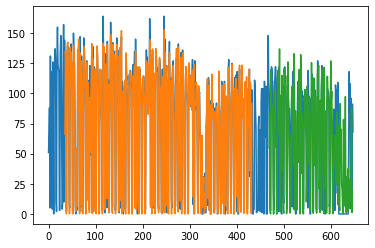

In [15]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [16]:
df_val = scaler.inverse_transform(testX[0])
df_val = np.reshape(df_val, (35,1))
df_val.shape

(35, 1)

In [17]:
df_date = pd.read_csv('test.csv', usecols=[0], engine='python')
df.tail()

,VOLUME
2019-11-06,96
2019-11-07,90
2019-11-08,8
2019-11-09,91
2019-11-10,68


In [18]:
df_date = df_date.iloc[:35]

In [19]:
df_date.shape

(35, 1)

In [20]:
df_date['value'] =  df_val

In [21]:
print(df_date.head())
df_date.to_csv('sample_data.csv', index=False)

       DATECL       value
0  2018-02-01    0.000000
1  2018-02-02    0.000000
2  2018-02-03    4.000000
3  2018-02-04    4.000000
4  2018-02-05  110.999992


In [22]:
sample_file = "sample_data.csv"
df = pd.read_csv(sample_file)
df.dropna()
window = 35
max_iter = 709
sample_values = df.value[:window].tolist()
for i in range(max_iter):
    test_sample = np.array(sample_values[i:i+window])
    test_sample = np.reshape(test_sample, (1, test_sample.shape[0]))
    scaled_sample = scaler.transform(test_sample)
    scaled_sample = np.reshape(scaled_sample, (1, 1, test_sample.shape[1]))
    sample_pred = model.predict(scaled_sample)
    sample_pred = scaler.inverse_transform(sample_pred)
    sample_values.append(round(sample_pred[0][0]))

In [23]:
import datetime
df = pd.read_csv("sample_data.csv", index_col="DATECL")
df.index = pd.DatetimeIndex(df.index)
print(df.index[-1])
df = df.reindex(pd.date_range(df.index[0], df.index[-1] + datetime.timedelta(days=709)), fill_value=0)
df.to_csv('test_data.csv', index_label = 'DATECL')

2018-03-07 00:00:00


In [24]:
test_file = "test_data.csv"
test_df = pd.read_csv(test_file)
test_df["value"] = sample_values
test_df.to_csv(test_file, index=False)

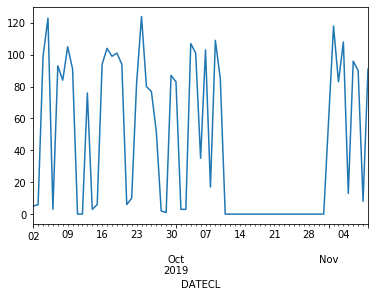

In [25]:
from pandas import datetime
def parser(x):
	return datetime.strptime(x, '%Y-%m-%d')
series = pd.read_csv('test.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
# iterating the columns 

series[-70:-1].plot()
pyplot.show()

In [26]:
def parser(x):
	return datetime.strptime(x, '%Y-%m-%d')

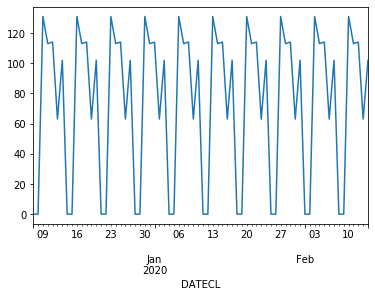

In [27]:
series = pd.read_csv('test_data.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
# iterating the columns 

series[-70:].plot()
pyplot.show()